1.2. □ (0pts) Load the dataset. You can use **gzip.open** and **json.load** to do that.

In [1]:
import gzip
import json 
import pandas as pd
with gzip.open('geomotions/goemotions.json.gz', 'rb') as f:
    file_content = json.load(f) # to see what is in the file 
    

In [2]:
# Visualize the first 20 collection of posts by using enumerate
# Try and get a better idea on how to classify EMOTIONS and SENTIMENTS based on a POST 
for reddit_post, post in enumerate(file_content[:10]):
    print(reddit_post, post)
    print('\n')

0 ['That game hurt.', 'sadness', 'negative']


1 ["You do right, if you don't care then fuck 'em!", 'neutral', 'neutral']


2 ['Man I love reddit.', 'love', 'positive']


3 ['[NAME] was nowhere near them, he was by the Falcon. ', 'neutral', 'neutral']


4 ['Right? Considering it’s such an important document, I should know the damned thing backwards and forwards... thanks again for the help!', 'gratitude', 'positive']


5 ["He isn't as big, but he's still quite popular. I've heard the same thing about his content. Never watched him much.", 'disapproval', 'negative']


6 ["That's crazy; I went to a super [RELIGION] high school and I think I can remember 2 girls the entire 4 years that became teen moms.", 'amusement', 'positive']


7 ["that's adorable asf", 'amusement', 'positive']


8 ['"Sponge Blurb Pubs Quaw Haha GURR ha AAa!" finale is too real', 'amusement', 'positive']


9 ["I have, and now that you mention it, I think that's what triggered my nostalgia. ", 'neutral', 'neutral']




In [3]:
import pandas as pd
# Creating a pandas dataframe from a list 
df = pd.DataFrame(file_content, columns =['Post', 'Emotion', 'Sentiment'])
df.head()

,Post,Emotion,Sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive


In [4]:
# Will use the groupby function to describe by emotion, so we can do some exploratory data analysis
emotion_table = df.groupby('Emotion').describe()
emotion_table

Post         \
                count unique   
Emotion                        
admiration      10531   6830   
amusement        6130   3877   
anger            5202   3985   
annoyance        8342   6817   
approval        11259   8917   
caring           3523   2741   
confusion        4938   3863   
curiosity        5885   4090   
desire           2147   1682   
disappointment   4706   3968   
disapproval      7686   5969   
disgust          2914   2363   
embarrassment    1433   1197   
excitement       3020   2463   
fear             1778   1295   
gratitude        7075   3909   
grief             351    311   
joy              4329   3381   
love             4957   2957   
nervousness       796    699   
neutral         55298  31446   
optimism         4519   3523   
pride             690    627   
realization      4714   4061   
relief            788    681   
remorse          1510   1113   
sadness          3827   2926   
surprise         3472   2604   

                                                                        \
                                                              top freq   
Emotion                                                                  
admiration                                        This is amazing    7   
amusement       LOL thats right, your wait for someone to hand...    5   
anger                                              [NAME] damn it    7   
annoyance                                       Weird flex but ok    5   
approval                                        I agree with this    7   
caring                                                 Bless you.    7   
confusion                                             I'm puzzled    5   
curiosity                                        Are you serious?    6   
desire          I wish they would put dfs in for [NAME] right now    5   
disappointment  I am vuri disappointed in you. You gained turd...    5   
disapproval                                               Lol no.    5   
disgust                                       You are disgusting.    6   
embarrassment   Nobody said they don't have the right. It's st...    5   
excitement                                        Happy cake day!   11   
fear                                              [NAME] is scary    6   
gratitude                                              Thank you.   45   
grief                  That poor mercy. Just died to die again xD    3   
joy                                               Happy cake day!    6   
love                                                I love [NAME]   16   
nervousness     Disney World/Land or NYE at Time's Square have...    4   
neutral                                                   [NAME].   22   
optimism                                               Good luck!   11   
pride                       Boy what an accomplishment, so proud!    5   
realization                               This is how mafia works    4   
relief          At last, someone I can share this accomplishme...    3   
remorse         I apologised an very long time ago as I was wr...    4   
sadness                                             I miss [NAME]    6   
surprise                                             oh my [NAME]    6   

               Sentiment                           
                   count unique        top   freq  
Emotion                                            
admiration         10531      1   positive  10531  
amusement           6130      1   positive   6130  
anger               5202      1   negative   5202  
annoyance           8342      1   negative   8342  
approval           11259      1   positive  11259  
caring              3523      1   positive   3523  
confusion           4938      1  ambiguous   4938  
curiosity           5885      1  ambiguous   5885  
desire              2147      1   positive   2147  
disappointment      4706      1   negative   4706  
disapproval         7686      1   negative   7686  
d

In [5]:
sentiment_table = df.groupby('Sentiment').describe()
sentiment_table

Post                               Emotion                    \
           count unique               top freq   count unique        top   
Sentiment                                                                  
ambiguous  19009  12472  Are you serious?   10   19009      4  curiosity   
negative   38545  21352     I miss [NAME]   13   38545     11  annoyance   
neutral    55298  31446           [NAME].   22   55298      1    neutral   
positive   58968  30515        Thank you.   45   58968     12   approval   

                  
            freq  
Sentiment         
ambiguous   5885  
negative    8342  
neutral    55298  
positive   11259

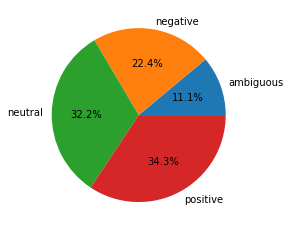

In [6]:
# Creating a pie chart based on the sentiments
import numpy as np
import matplotlib.pyplot as plt
s = sentiment_table['Post']['count'] # get the SENTIMENT column from the df dataframe 
sentiment_array = np.array(s) # create a numpy array with column from var s
my_labels = ["ambiguous", "negative", "neutral", "positive"]
plt.pie(sentiment_array, labels = my_labels, autopct='%1.1f%%')
plt.show() 

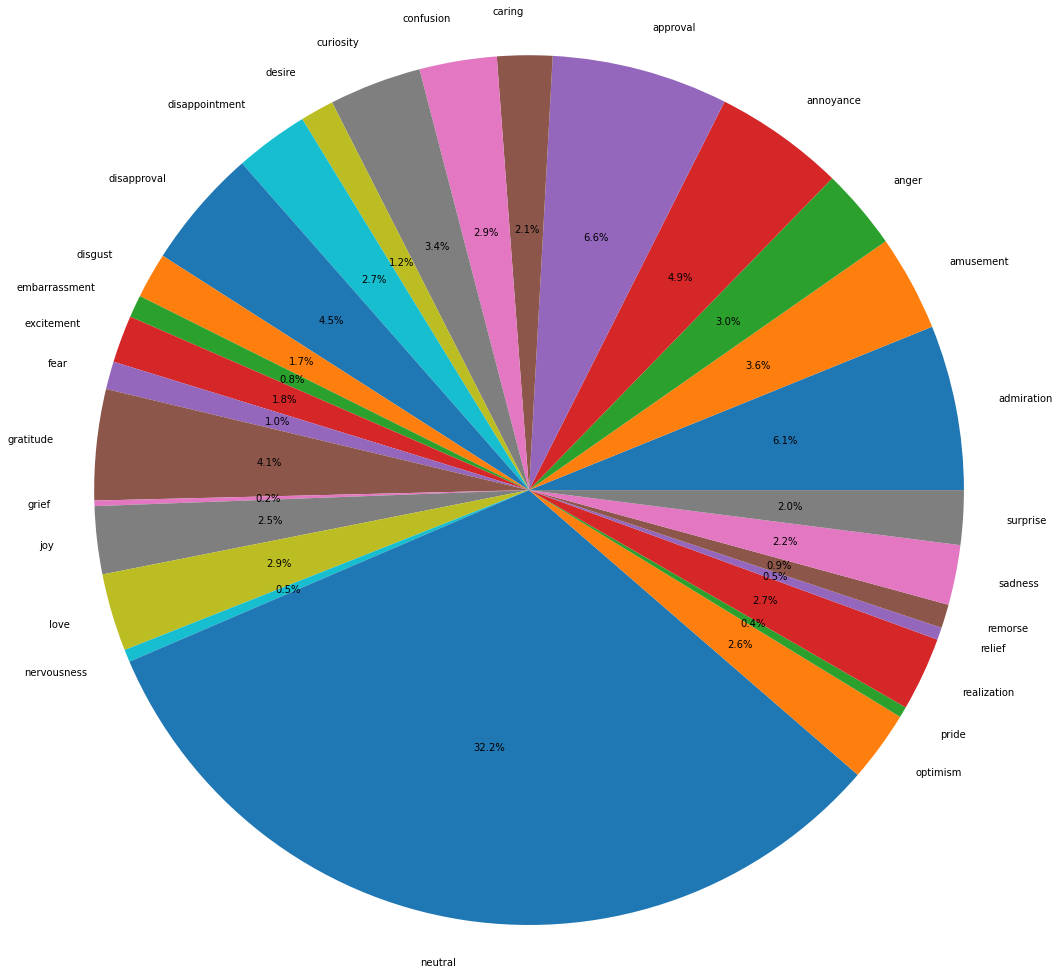

In [7]:
# Creating a pie chart based on the emotions
e = emotion_table['Post']['count'] # get the COUNT colum from the df dataframe
emotion_array = np.array(e) # create a numpy array with column from var e
my_labels = ["admiration", "amusement", "anger", "annoyance", "approval", "caring", "confusion", "curiosity", "desire",
             "disappointment", "disapproval", "disgust", "embarrassment", "excitement", "fear", "gratitude", "grief", "joy",
             "love", "nervousness", "neutral", "optimism", "pride", "realization", "relief", "remorse", "sadness", "surprise"]
plt.pie(emotion_array, labels = my_labels, autopct='%1.1f%%', radius = 5)
plt.show() 

□ (5pts) Process the dataset using feature **extraction.text.CountVectorizer** to extract tokens/words
and their frequencies. Display the number of tokens (the size of the vocabulary) in the dataset

In [8]:
# Create two objects, X and y where X is the Posts corpus and y is the features/classes 
X = df['Post']
y = df['Sentiment']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Displays the number of tokens(size of the vocab)
words_display = CountVectorizer().fit(df['Post'])

print(len(words_display.vocabulary_))

30449


In [10]:
#  extract tokens/words and their frequencies
word_freq = words_display.vocabulary_
word_freq

{'that': 26899,
 'game': 11309,
 'hurt': 13362,
 'you': 30300,
 'do': 8256,
 'right': 22728,
 'if': 13530,
 'don': 8337,
 'care': 4571,
 'then': 26939,
 'fuck': 11116,
 'em': 9069,
 'man': 16377,
 'love': 16094,
 'reddit': 21940,
 'name': 17815,
 'was': 29324,
 'nowhere': 18409,
 'near': 17930,
 'them': 26929,
 'he': 12616,
 'by': 4307,
 'the': 26906,
 'falcon': 9976,
 'considering': 6087,
 'it': 14466,
 'such': 26023,
 'an': 1612,
 'important': 13703,
 'document': 8268,
 'should': 24177,
 'know': 15107,
 'damned': 7006,
 'thing': 26995,
 'backwards': 2581,
 'and': 1652,
 'forwards': 10888,
 'thanks': 26891,
 'again': 1212,
 'for': 10773,
 'help': 12745,
 'isn': 14445,
 'as': 2099,
 'big': 3218,
 'but': 4261,
 'still': 25658,
 'quite': 21477,
 'popular': 20482,
 've': 28825,
 'heard': 12653,
 'same': 23216,
 'about': 810,
 'his': 12924,
 'content': 6156,
 'never': 18073,
 'watched': 29353,
 'him': 12893,
 'much': 17629,
 'crazy': 6556,
 'went': 29528,
 'to': 27300,
 'super': 26131,
 'r

In [11]:
# Use the fit_transform method on the CountVectorizer object and pass in X
# To transform the post corpus training set into a feature vector
X = CountVectorizer().fit_transform(df['Post'])

In [12]:
X

<171820x30449 sparse matrix of type '<class 'numpy.int64'>'
	with 1936209 stored elements in Compressed Sparse Row format>

In [13]:
# To split the train and testing of the posts 
from sklearn.model_selection import train_test_split

post_train, post_test, sentiment_train, sentiment_test = train_test_split(X, y, test_size=0.2)

In [14]:
# Multinomial Naive Bayes Classifier
# For sentiments


from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(post_train, sentiment_train)
print(list(post_test)[999])
print(list(sentiment_test)[999])

  (0, 26906)	2
  (0, 26891)	1
  (0, 10773)	1
  (0, 18656)	2
  (0, 29838)	1
  (0, 25153)	1
  (0, 2258)	1
  (0, 22364)	1
  (0, 13099)	1
positive


In [15]:
# Test to see if the Naive Bayes Classifier works 
predictions = sentiment_detect_model.predict(post_test)
print('predicted:', predictions)
print('expected:', sentiment_test)

predicted: ['negative' 'negative' 'negative' ... 'neutral' 'positive' 'positive']
expected: 159407      neutral
98757      positive
66623       neutral
164632      neutral
60680      positive
            ...    
24644       neutral
75193      positive
162685    ambiguous
4819        neutral
134963     positive
Name: Sentiment, Length: 34364, dtype: object


In [16]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(sentiment_test,predictions))
print('\n')
print(classification_report(sentiment_test,predictions))

[[ 910  613 1440  833]
 [ 296 4058 2065 1265]
 [ 670 1983 5472 2964]
 [ 300  924 2224 8347]]


              precision    recall  f1-score   support

   ambiguous       0.42      0.24      0.30      3796
    negative       0.54      0.53      0.53      7684
     neutral       0.49      0.49      0.49     11089
    positive       0.62      0.71      0.66     11795

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



In [17]:
# Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters for sentiments 
from sklearn import tree
from sklearn import preprocessing

sentiment_detect_model_dt = tree.DecisionTreeClassifier(criterion="entropy").fit(post_train, sentiment_train)
sentiment_detect_model_dt.tree_.max_depth

1140

In [18]:
predictions_dt = sentiment_detect_model_dt.predict(post_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(sentiment_test,predictions_dt))
print('\n')
print(classification_report(sentiment_test,predictions_dt))

[[1816  613  939  428]
 [ 851 4536 1539  758]
 [1644 2541 5228 1676]
 [ 852 1351 2652 6940]]


              precision    recall  f1-score   support

   ambiguous       0.35      0.48      0.41      3796
    negative       0.50      0.59      0.54      7684
     neutral       0.50      0.47      0.49     11089
    positive       0.71      0.59      0.64     11795

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.54     34364



In [20]:
# Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.
from sklearn.neural_network import MLPClassifier

sentiment_detect_model_mlp = MLPClassifier(max_iter= 10).fit(post_train,sentiment_train)

C:\Users\gorma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
predictions_mlp = sentiment_detect_model_mlp.predict(post_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(sentiment_test,predictions_mlp))
print('\n')
print(classification_report(sentiment_test,predictions_mlp))

[[1310  562 1269  655]
 [ 475 4330 1818 1061]
 [1003 2061 5505 2520]
 [ 477 1012 2157 8149]]


              precision    recall  f1-score   support

   ambiguous       0.40      0.35      0.37      3796
    negative       0.54      0.56      0.55      7684
     neutral       0.51      0.50      0.50     11089
    positive       0.66      0.69      0.67     11795

    accuracy                           0.56     34364
   macro avg       0.53      0.52      0.53     34364
weighted avg       0.56      0.56      0.56     34364



In [23]:
# Top-MNB: a better performing Multinomial Naive Bayes Classifier found using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0,0.5,1.0,1.5]}

grid = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# fitting the model for grid search 
grid.fit(post_train, sentiment_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(post_test) 
   
# print classification report 
print(classification_report(sentiment_test, grid_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'alpha': 1.0}
              precision    recall  f1-score   support

   ambiguous       0.42      0.24      0.30      3796
    negative       0.54      0.53      0.53      7684
     neutral       0.49      0.49      0.49     11089
    positive       0.62      0.71      0.66     11795

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



In [24]:
# Top-DT: a better performing Decision Tree found using GridSearchCV
# from sklearn.model_selection import GridSearchCV

# param_grid = {'criterion': ['gini','entropy'], 'max_depth': [1121,1122] , 'min_samples_split': [2,3,4]}

# grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# # fitting the model for grid search 
# grid.fit(post_train, sentiment_train) 
 
# # print best parameter after tuning 
# print(grid.best_params_) 
# grid_predictions = grid.predict(post_test) 
   
# # print classification report 
# print(classification_report(sentiment_test, grid_predictions))

In [29]:
# Do only one of the following, depending on your own interest:
# Use tf-idf instead of word frequencies and redo all substeps of 2.3 above – you can use TfidfTransformer
# for this. Display the results of this experiment.

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(X)
posts_tfidf = tfidf_transformer.transform(X)
print(messages_tfidf.shape)
print(posts_tfidf)

(171820, 30449)
  (0, 26899)	0.28627292015470523
  (0, 13362)	0.758602175803937
  (0, 11309)	0.5852952708262985
  (1, 30300)	0.325166924786979
  (1, 26939)	0.30620930163884036
  (1, 22728)	0.30602759463627793
  (1, 13530)	0.24321908432588615
  (1, 11116)	0.3615879127304925
  (1, 9069)	0.482796936326271
  (1, 8337)	0.2516255901454582
  (1, 8256)	0.2615414270488159
  (1, 4571)	0.3900459805172147
  (2, 21940)	0.6811887599110742
  (2, 16377)	0.5514630924006202
  (2, 16094)	0.48152915912824856
  (3, 29324)	0.3667620109313706
  (3, 26929)	0.23719119850170206
  (3, 26906)	0.11041843328556872
  (3, 18409)	0.45495575404332794
  (3, 17930)	0.39475762686157534
  (3, 17815)	0.15188275880851118
  (3, 12616)	0.19399846971162987
  (3, 9976)	0.5572759116790951
  (3, 4307)	0.2509087279622667
  (4, 26995)	0.18570228778292916
  :	:
  (171818, 16012)	0.6188349476566765
  (171818, 1534)	0.7250583764548544
  (171819, 28683)	0.2161235770268512
  (171819, 27300)	0.144563541811683
  (171819, 26997)	0.168576981

In [30]:
# To split the train and testing of the posts similar to before 

from sklearn.model_selection import train_test_split

post_train, post_test, sentiment_train, sentiment_test = train_test_split(posts_tfidf, y, test_size=0.2)

In [31]:
# Now need to repeat all steps
# Base-MNB
from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB().fit(post_train, sentiment_train)

In [32]:
predictions = sentiment_detect_model.predict(post_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(sentiment_test,predictions))
print('\n')
print(classification_report(sentiment_test,predictions))

[[ 141  309 2146 1161]
 [  18 2655 3275 1776]
 [  60  970 6499 3592]
 [  13  417 2509 8823]]


              precision    recall  f1-score   support

   ambiguous       0.61      0.04      0.07      3757
    negative       0.61      0.34      0.44      7724
     neutral       0.45      0.58      0.51     11121
    positive       0.57      0.75      0.65     11762

    accuracy                           0.53     34364
   macro avg       0.56      0.43      0.42     34364
weighted avg       0.55      0.53      0.49     34364



In [38]:
# Base-DT
sentiment_detect_model_dt = tree.DecisionTreeClassifier(criterion="entropy").fit(post_train, sentiment_train)

In [39]:
predictions_dt = sentiment_detect_model_dt.predict(post_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(sentiment_test,predictions_dt))
print('\n')
print(classification_report(sentiment_test,predictions_dt))

[[1777  614  940  426]
 [ 860 4632 1529  703]
 [1621 2561 5160 1779]
 [ 894 1415 2507 6946]]


              precision    recall  f1-score   support

   ambiguous       0.34      0.47      0.40      3757
    negative       0.50      0.60      0.55      7724
     neutral       0.51      0.46      0.49     11121
    positive       0.70      0.59      0.64     11762

    accuracy                           0.54     34364
   macro avg       0.52      0.53      0.52     34364
weighted avg       0.56      0.54      0.54     34364

